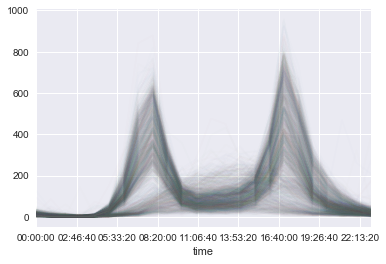

In [1]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import numpy as np
%matplotlib inline
import pandas as pd

from jupyterworkflow.data import get_data   #the python package you created
data=get_data()

#getting that pivoted table from the other ipython notebook
pivoted=data.pivot_table("Total", index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False,alpha=0.01) #takes a while because you have a line for each day of the day


In [2]:
print(pivoted.T.shape)
# you can see this as 1671 observations, where each observation is 24 hours


(1671, 24)


# # First thing we're going to do is reduce the dimensionality with PCA

In [3]:
from sklearn.decomposition import PCA
X=pivoted.fillna(0).T.values
X2=PCA(2).fit_transform(X)# this tells it the number of components we want to reduce this to is 2




In [4]:
X2.shape

(1671, 2)

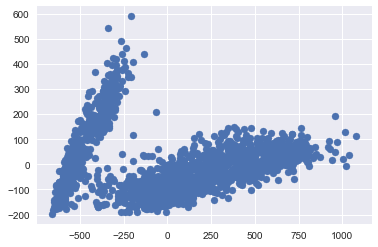

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X2[:,0],X2[:,1])

from here you can see that there's 2 distinct types of days.
one thing we could do is to simply try to identify which type of day it is. 

We will be using gaussian mixture models (sort of like MCMC?)
to help us determine to which group a data point belongs to.

So PCA will reduce the dimensions to the most helpful inputs 

Gaussian mixtures will help identify groups?



In [6]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(2) #reducing it to two groups

gmm.fit(X)
labels=gmm.predict(X)
labels

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

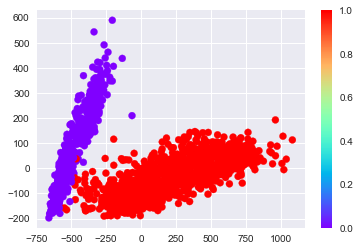

In [7]:
plt.scatter(X2[:,0],X2[:,1], c=labels, cmap="rainbow") #c is for color

plt.colorbar()

Let's just look at one of these, see what it looks like in the original dataset.

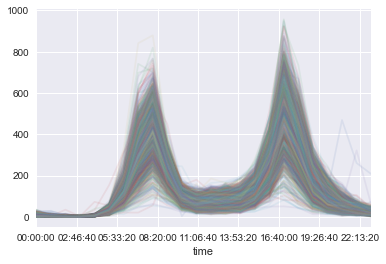

In [8]:
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1)
#here you can see the daily commuters! data is much cleaner

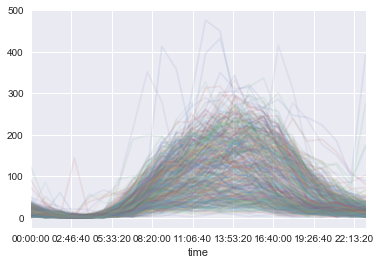

In [9]:
pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1)
#you can see that this is much more random. These bike rides probably have less to do with commuting


Now lets find out on what days the messy rides occur...

In [10]:
pivoted.index.dtype #interestingly the dtype is object

#if we turn this into a datetime then we can get access to a tool that will
#tell us what day of the week it is. 

dayofweek=pd.DatetimeIndex(pivoted.columns).dayofweek

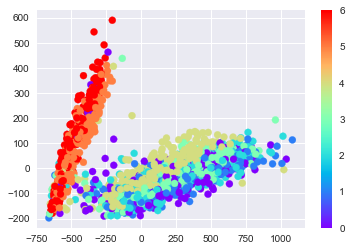

In [12]:
plt.scatter(X2[:,0],X2[:,1], c=dayofweek, cmap="rainbow") #c is for color
plt.colorbar();

In [13]:
#you can see that the 0 to 4 is the monday to friday. 
#as you can see there are some that are still on weekdays but
#seem to act as weekends (colored ones being grouped with the reddish ones)


dates=pd.DatetimeIndex(pivoted.columns)
dates[(labels==1)&(dayofweek<5)]
#you'll notice that many of these look like holidays. That makes sense.



DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2017-04-17', '2017-04-18', '2017-04-19', '2017-04-20',
               '2017-04-21', '2017-04-24', '2017-04-25', '2017-04-26',
               '2017-04-27', '2017-04-28'],
              dtype='datetime64[ns]', length=1152, freq=None)